# Exploratory Data Analysis.

In [4]:
import seaborn as sns

from process_security_libraries_dataset import load_security_libraries_df

In [2]:
df = load_security_libraries_df("../data/security_libraries_dependents_count.json")

[DEBUG] 2025-11-08T16:32:12+0100: Loaded backend module://matplotlib_inline.backend_inline version unknown.
[DEBUG] 2025-11-08T16:32:12+0100: Loaded backend module://matplotlib_inline.backend_inline version unknown.
[DEBUG] 2025-11-08T16:32:12+0100: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[DEBUG] 2025-11-08T16:32:12+0100: findfont: score(FontEntry(fname='C:\\Users\\msmar\\msro\\lucerna\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 3.05
[DEBUG] 2025-11-08T16:32:12+0100: findfont: score(FontEntry(fname='C:\\Users\\msmar\\msro\\lucerna\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
[DEBUG] 2025-11-08T16:32:12+0100: findfont: score(FontEntry(fn

<Axes: xlabel='dependentCount', ylabel='Count'>

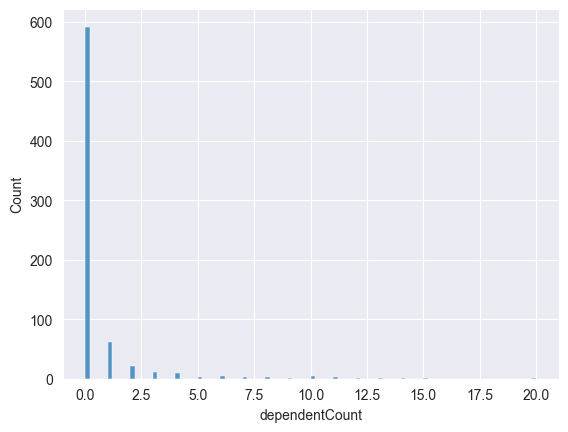

In [3]:
sns.histplot(data=df, x="dependentCount", bins=100, binrange=(0, 20))

In [37]:
for min_dependents in [1, 10, 100]:
    print(f"{df[df["dependentCount"] >= min_dependents].shape[0]} libraries have at least {min_dependents} dependents.")

170 libraries have at least 1 dependents.
52 libraries have at least 10 dependents.
19 libraries have at least 100 dependents.
